In [383]:
import numpy as np
import pandas as pd

In [384]:
noaa_all = pd.read_csv('/Users/meganvanderwiele/Desktop/DMP/noaa_chicago_weather_basic_1960-now.csv')

In [385]:
#convert to date time data
noaa_all['DATE'] = pd.to_datetime(noaa_all['DATE'])

**Winter Weather Data**

Graphing all winter temperatures from 1960 and on

In [386]:
def filter_winter_months(data: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Filters the dataset to include only records from December, January, and February
    starting from 1960 until the current year.

    :param data: DataFrame containing the data.
    :param date_column: The name of the column containing date values (assumed to be datetime type).
    :return: Filtered DataFrame with only December, January, and February data.
    """
    return data[(data[date_column].dt.year >= 1960) & (data[date_column].dt.month.isin([12, 1, 2]))]

In [387]:
wintermonths = filter_winter_months(noaa_all, 'DATE')
wintermonths = wintermonths[['DATE', 'TMAX', 'TMIN', 'PRCP', 'SNOW']]
wintermonths = wintermonths.dropna()

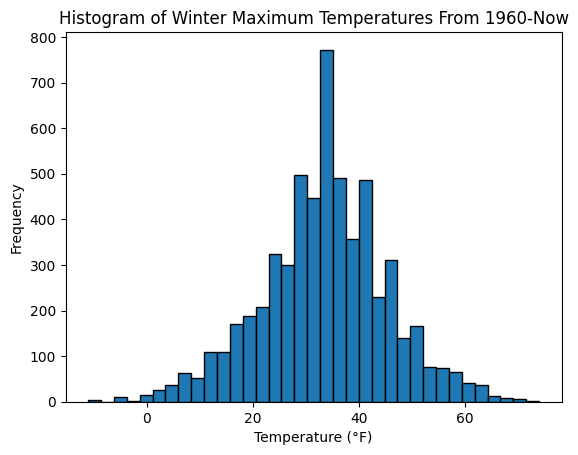

In [388]:
import matplotlib.pyplot as plt
plt.hist(wintermonths['TMAX'], bins=35, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Winter Maximum Temperatures From 1960-Now')
plt.show()

Pick out data from extreme events and create new histogram. Overlay the two histograms and complete a t-test to see if the extreme temperatures are signifigant

In [389]:
#extreme weather events used: January 26-27 of 1967, December 22-25 of 1983, January 12-14 of 1979, January 1977, January 19-21 of 1985
date_ranges = [
    ('1967-01-26', '1967-01-27'),
    ('1983-12-22', '1983-12-25'),
    ('1979-01-12', '1979-01-14'),
    ('1977-01-01', '1977-01-31'),
    ('1985-01-19', '1985-01-21')
]
extreme_winter = pd.concat([noaa_all[(noaa_all['DATE'] >= start) & (noaa_all['DATE'] <= end)] for start, end in date_ranges])

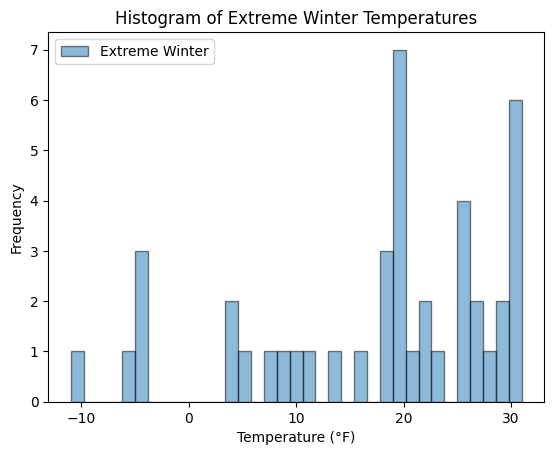

In [390]:
#create a new histogram of just the extreme winter events
plt.hist(extreme_winter['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='Extreme Winter')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Extreme Winter Temperatures')
plt.legend()
plt.show()

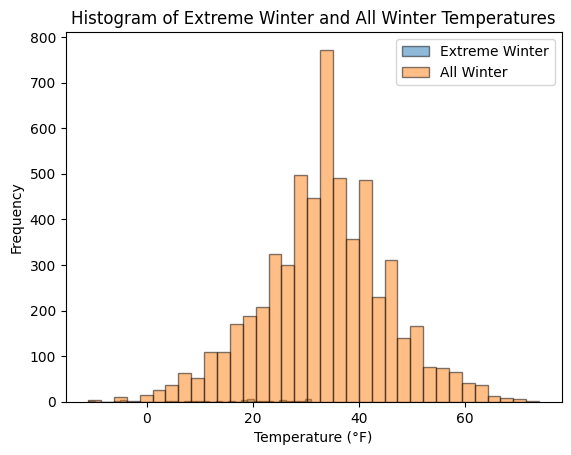

In [391]:
#create a histogram of the winter months and the extreme winter events
plt.hist(extreme_winter['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='Extreme Winter')
plt.hist(wintermonths['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='All Winter')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Extreme Winter and All Winter Temperatures')
plt.legend()
plt.show()

NOTE: Have lines going up for the events I care about instead of a histogram so I can see them without overlapping. Can also show their p-values

In [392]:
from scipy.stats import ttest_ind

#variables
variables = ['TMIN', 'TMAX', 'SNOW']


results = []

for var in variables:
    full_data = wintermonths[var].dropna()
    filtered_data = extreme_winter[var].dropna()

    # Perform T-test
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)

    results.append({
        "Variable": var,
        "Test Statistic": stat,
        "p-value": p_value,
        "Significant (p < 0.05)": p_value < 0.05
    })

# results
t_test_results = pd.DataFrame(results)
print(t_test_results)

  Variable  Test Statistic       p-value  Significant (p < 0.05)
0     TMIN        8.699929  5.435684e-11                    True
1     TMAX        9.245360  9.502276e-12                    True
2     SNOW       -1.549241  1.288148e-01                   False


NOTE: Need to do the same with data going back to 1993

**Summer Weather Data**

In [393]:
def filter_summer_months(data: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Filters the dataset to include only records from June July and August
    starting from 1960 until the current year.

    :param data: DataFrame containing the data.
    :param date_column: The name of the column containing date values (assumed to be datetime type).
    :return: Filtered DataFrame with only June July and August data.
    """
    return data[(data[date_column].dt.year >= 1960) & (data[date_column].dt.month.isin([6, 7, 8]))]

In [394]:
summermonths = filter_summer_months(noaa_all, "DATE")
summermonths = summermonths[['DATE', 'TMAX', 'TMIN','SNOW', 'PRCP']]
summermonths = summermonths.dropna()

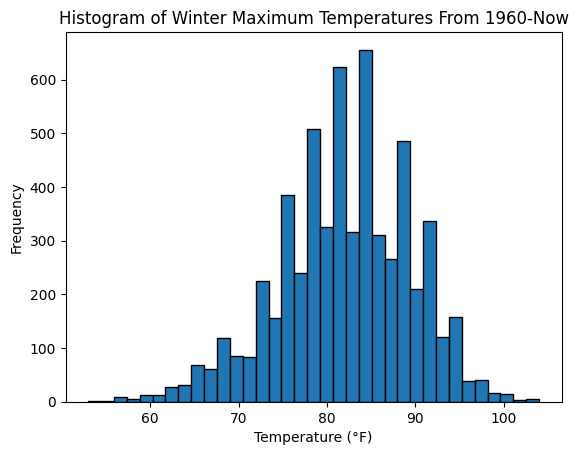

In [395]:
import matplotlib.pyplot as plt
plt.hist(summermonths['TMAX'], bins=35, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Winter Maximum Temperatures From 1960-Now')
plt.show()

In [396]:
#extreme weather events used: July 12-16 1995, July 2-6 of 2012, August 1-4 of 1988, August 23-24 2023, June 20-21 of 1988
date_ranges = [
    ('1995-07-12', '1995-07-16'),
    ('2012-07-02', '2012-07-06'),
    ('1988-08-01', '1988-08-04'),
    ('2023-08-23', '2023-08-24'),
    ('1988-06-20', '1988-06-21')
]

# Filter the dataset based on the date ranges
extreme_summer = pd.concat([noaa_all[(noaa_all['DATE'] >= start) & (noaa_all['DATE'] <= end)] for start, end in date_ranges])

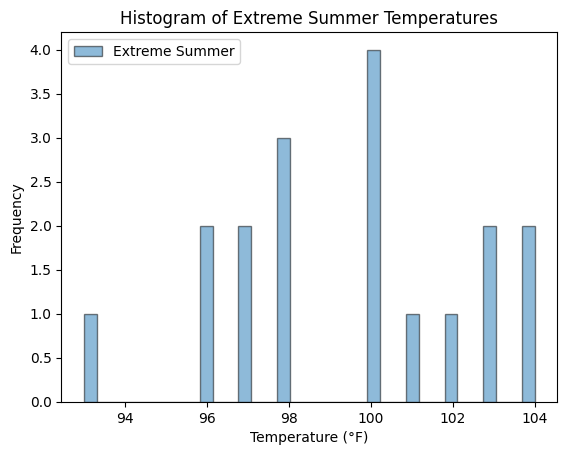

In [397]:
plt.hist(extreme_summer['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='Extreme Summer')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Extreme Summer Temperatures')
plt.legend()
plt.show()

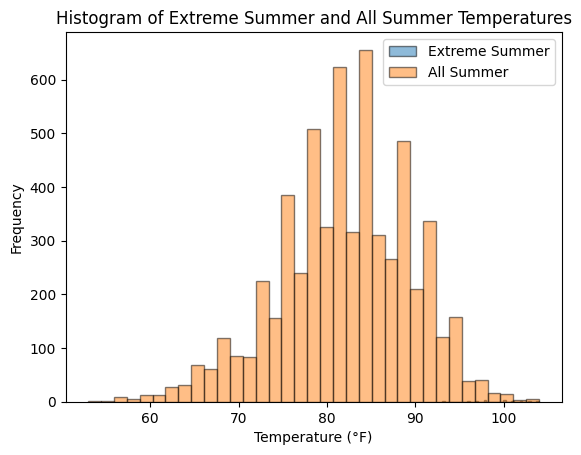

In [398]:
plt.hist(extreme_summer['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='Extreme Summer')
plt.hist(summermonths['TMAX'], bins=35, edgecolor='black', alpha=0.5, label='All Summer')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Extreme Summer and All Summer Temperatures')
plt.legend()
plt.show()

In [399]:
variables = ['TMIN', 'TMAX']


results = []

for var in variables:
    full_data = summermonths[var].dropna()
    filtered_data = extreme_summer[var].dropna()

    # Perform T-test
    stat, p_value = ttest_ind(full_data, filtered_data, equal_var=False)

    results.append({
        "Variable": var,
        "Test Statistic": stat,
        "p-value": p_value,
        "Significant (p < 0.05)": p_value < 0.05
    })

t_test_results = pd.DataFrame(results)
print(t_test_results)

  Variable  Test Statistic       p-value  Significant (p < 0.05)
0     TMIN      -17.711700  1.386035e-12                    True
1     TMAX      -23.828801  7.592968e-15                    True


**Natural Gas Daily Data**

In [400]:
chi_daily = pd.read_excel('/Users/meganvanderwiele/Desktop/DMP/Chicago_Citygate_Daily.xlsx')
henry_daily = pd.read_excel('/Users/meganvanderwiele/Desktop/DMP/Henry_Hub_Daily.xlsx')

In [401]:
#what is the highest observes min, max, and average price for Chicago Citygate
print(chi_daily['averages'].max())
print(chi_daily['lows'].max())
print(chi_daily['highs'].max())

129.52
35.0
250.0


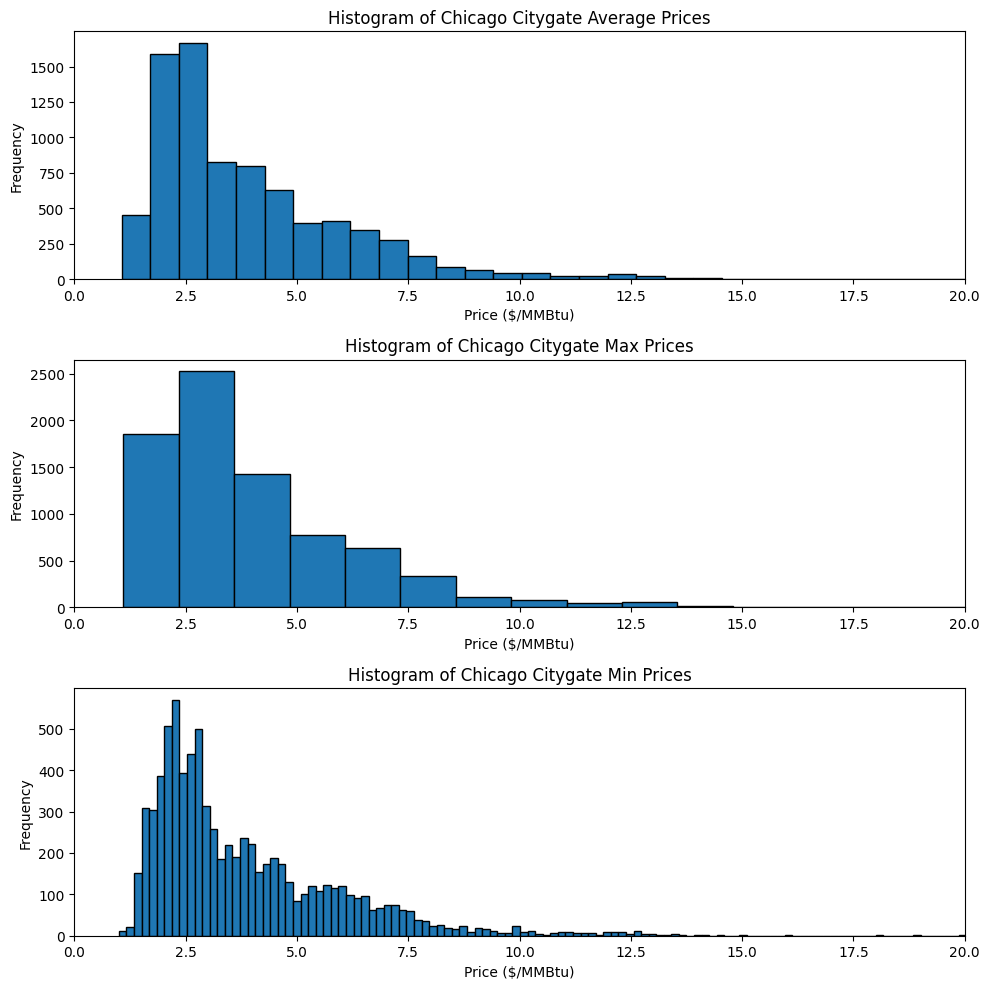

In [402]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].hist(chi_daily['averages'], bins=200, edgecolor='black')
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Chicago Citygate Average Prices')
axes[0].set_xlim(0, 20)
axes[1].hist(chi_daily['highs'], bins=200, edgecolor='black')
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Chicago Citygate Max Prices')
axes[1].set_xlim(0, 20)
axes[2].hist(chi_daily['lows'], bins=200, edgecolor='black')
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Chicago Citygate Min Prices')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()


NOTE: It is important to note that the x axis of these plots have been rescaled to show the trend in the histogram. On 2/12/21, prices reached a low of 35, and a high of over 200, so it was removed.

In [403]:
winterdailygas = filter_winter_months(chi_daily, 'issue_dates')

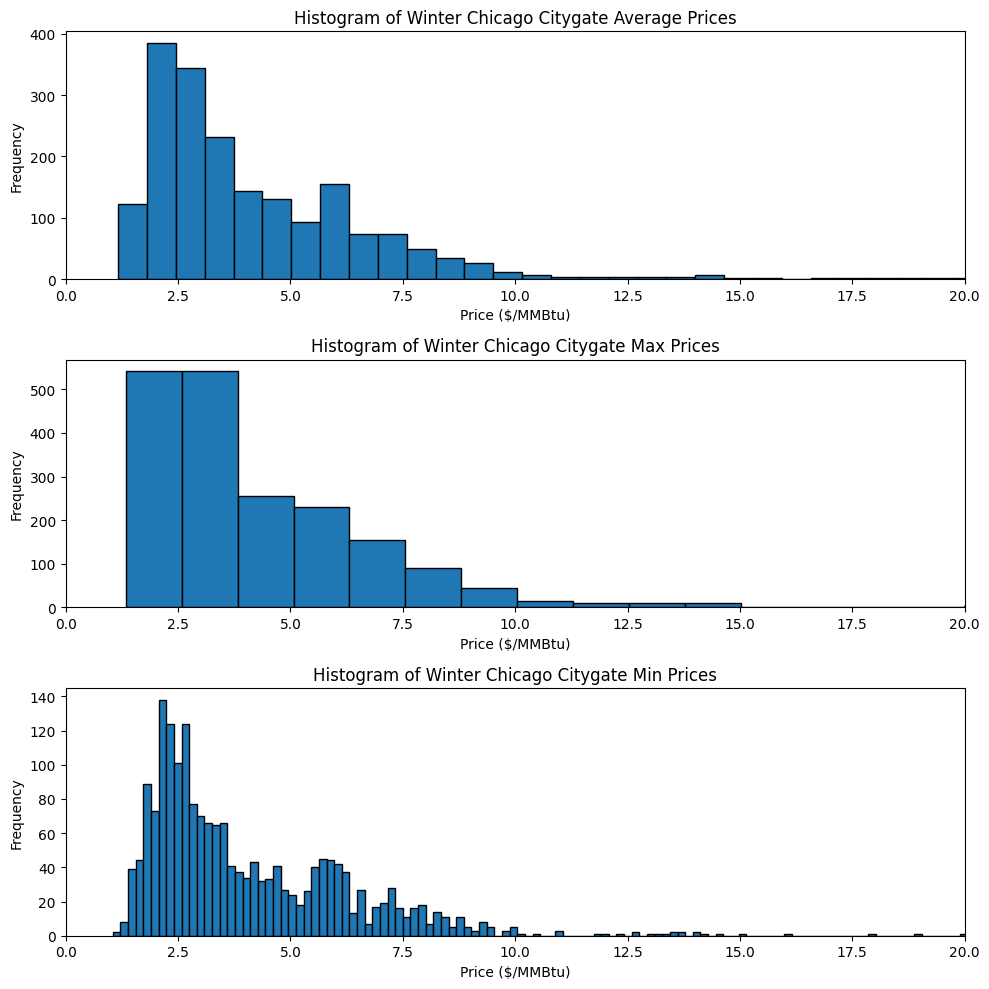

In [404]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].hist(winterdailygas['averages'], bins=200, edgecolor='black')
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Winter Chicago Citygate Average Prices')
axes[0].set_xlim(0, 20)
axes[1].hist(winterdailygas['highs'], bins=200, edgecolor='black')
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Winter Chicago Citygate Max Prices')
axes[1].set_xlim(0, 20)
axes[2].hist(winterdailygas['lows'], bins=200, edgecolor='black')
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Winter Chicago Citygate Min Prices')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()

In [405]:
summerdailygas = filter_summer_months(chi_daily, 'issue_dates')

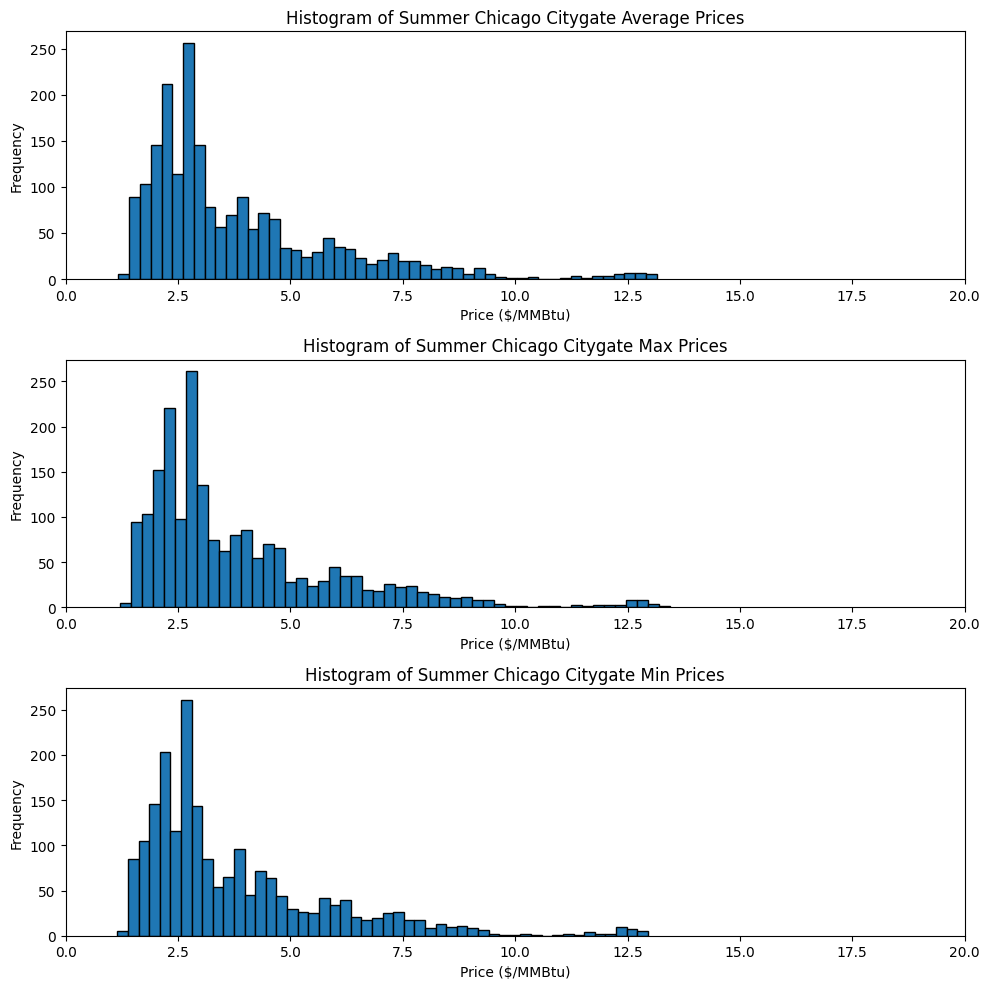

In [406]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].hist(summerdailygas['averages'], bins=50, edgecolor='black')
axes[0].set_xlabel('Price ($/MMBtu)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Summer Chicago Citygate Average Prices')
axes[0].set_xlim(0, 20)
axes[1].hist(summerdailygas['highs'], bins=50, edgecolor='black')
axes[1].set_xlabel('Price ($/MMBtu)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Summer Chicago Citygate Max Prices')
axes[1].set_xlim(0, 20)
axes[2].hist(summerdailygas['lows'], bins=50, edgecolor='black')
axes[2].set_xlabel('Price ($/MMBtu)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Summer Chicago Citygate Min Prices')
axes[2].set_xlim(0, 20)
plt.tight_layout()
plt.show()

In [407]:
#combine the noaa data set and the chicago citygate data set into one data frame by date
noaa_all['DATE'] = noaa_all['DATE'].dt.date
chi_daily['issue_dates'] = chi_daily['issue_dates'].dt.date
temp_and_gas = pd.merge(noaa_all, chi_daily, left_on='DATE', right_on='issue_dates', how='inner')


In [408]:
temp_and_gas = temp_and_gas[['DATE', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'averages', 'highs', 'lows']]
temp_and_gas.head()

,DATE,TMAX,TMIN,PRCP,SNOW,averages,highs,lows
0,1993-07-14,79.0,61.0,0.0,0.0,2.16,2.17,2.15
1,1993-07-15,80.0,59.0,0.0,0.0,2.16,2.17,2.14
2,1993-07-16,82.0,61.0,0.0,0.0,2.15,2.17,2.13
3,1993-07-19,88.0,65.0,0.0,0.0,2.15,2.17,2.13
4,1993-07-20,80.0,62.0,0.0,0.0,2.15,2.17,2.14


**Comparison of Weather Variables and Gas Prices**

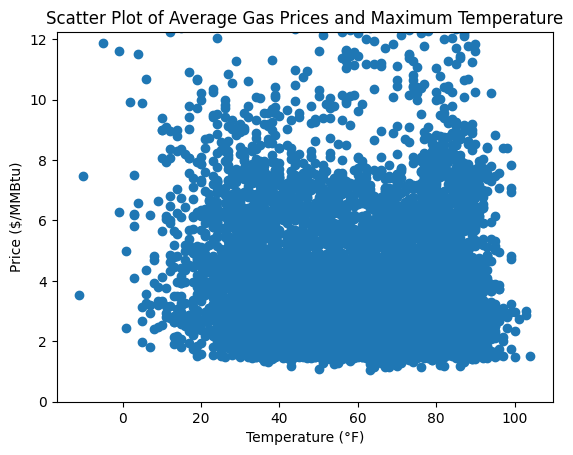

In [409]:
#scatter plot of the average gas prices and the maximum temperature with a line of best fit
plt.scatter(temp_and_gas['TMAX'], temp_and_gas['averages'])
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Average Gas Prices and Maximum Temperature')
plt.show()


This graph is so hard to red since there are so many data points. Trying to clean it up below.

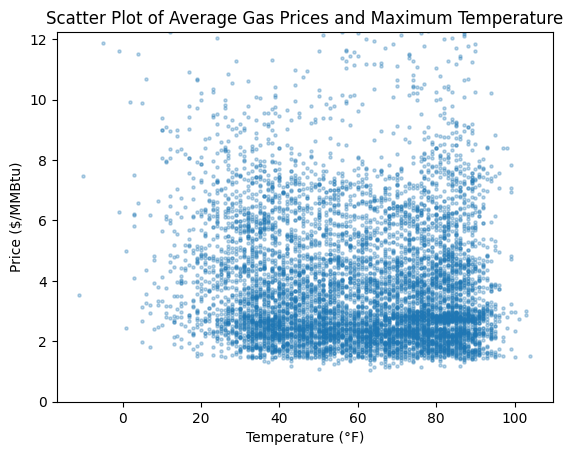

In [410]:
#reduce marker size 
plt.scatter(temp_and_gas['TMAX'], temp_and_gas['averages'], s=5, alpha=0.3)
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Average Gas Prices and Maximum Temperature')
plt.show()

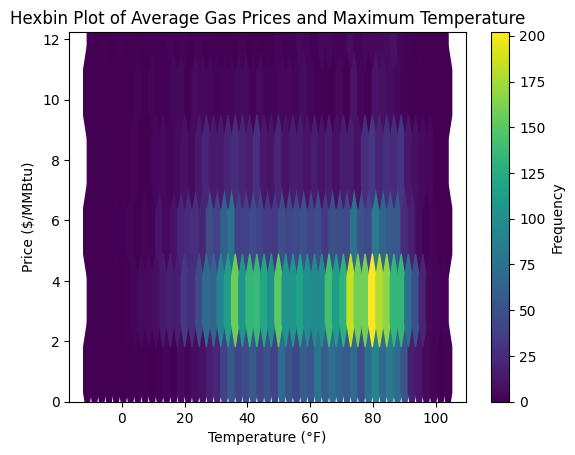

In [411]:
#hexbin plot
plt.hexbin(temp_and_gas['TMAX'], temp_and_gas['averages'], gridsize=50, cmap='viridis')
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Hexbin Plot of Average Gas Prices and Maximum Temperature')
plt.colorbar(label='Frequency')
plt.show()

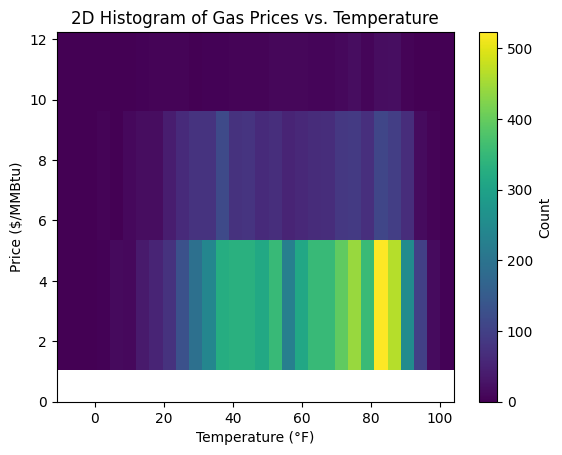

In [412]:
temp_and_gas = temp_and_gas.dropna(subset=['TMAX', 'averages'])
plt.hist2d(temp_and_gas['TMAX'], temp_and_gas['averages'], bins=[30, 30], cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Temperature (°F)')
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.ylabel('Price ($/MMBtu)')
plt.title('2D Histogram of Gas Prices vs. Temperature')
plt.show()

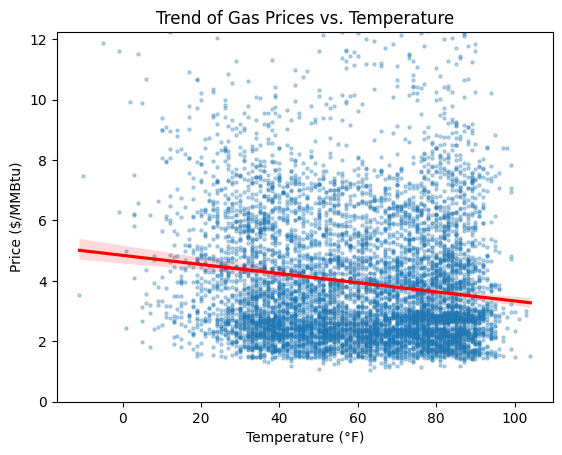

In [413]:
#line of best fit
import seaborn as sns
sns.regplot(x=temp_and_gas['TMAX'], y=temp_and_gas['averages'], scatter_kws={'s':5, 'alpha':0.3}, line_kws={'color':'red'})
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Trend of Gas Prices vs. Temperature')
plt.show()

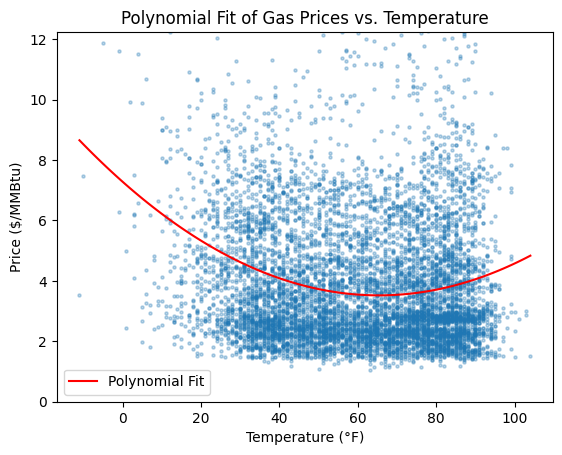

In [414]:
#polynomial regression
x = temp_and_gas['TMAX']
y = temp_and_gas['averages']
coeffs = np.polyfit(x, y, 2) # 2nd degree polynomial - quadratic
poly_eq = np.poly1d(coeffs)
x_sorted = np.linspace(x.min(), x.max(), 100)
y_poly = poly_eq(x_sorted)
plt.scatter(x, y, s=5, alpha=0.3)
plt.plot(x_sorted, y_poly, color='red', label='Polynomial Fit')
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Polynomial Fit of Gas Prices vs. Temperature')
plt.legend()
plt.show()




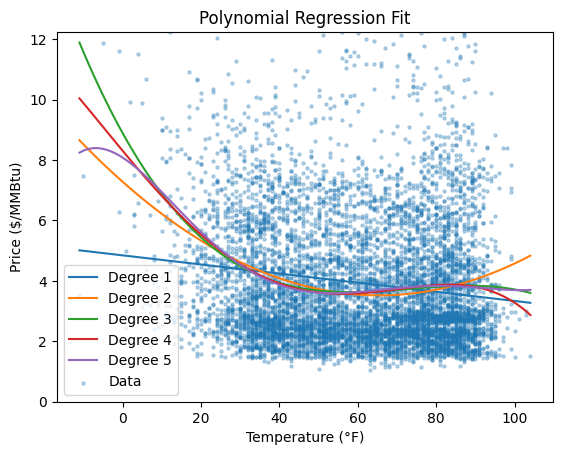

   Degree  R² Score      RMSE
0       1  0.013735  2.704328
1       2  0.034462  2.675761
2       3  0.038743  2.669823
3       4  0.039350  2.668979
4       5  0.039747  2.668428


In [415]:
#quantify results
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
x = temp_and_gas['TMAX'].values
y = temp_and_gas['averages'].values

degrees = [1, 2, 3, 4, 5]  #linear, quadratic, cubic, etc.
results = []

for d in degrees:
    coeffs = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeffs)
    
    y_pred = poly_eq(x)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    results.append((d, r2, rmse))
    
    x_sorted = np.linspace(x.min(), x.max(), 100)
    y_poly = poly_eq(x_sorted)
    
    plt.plot(x_sorted, y_poly, label=f'Degree {d}')

plt.scatter(x, y, s=5, alpha=0.3, label="Data")
plt.ylim(0, temp_and_gas['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Print R² and RMSE results
df_results = pd.DataFrame(results, columns=["Degree", "R² Score", "RMSE"])
print(df_results)

NOTE: This is all the data. Not seeing many STRONG trends here. The strongest trend is 4th or 5th degree. Not linear for sure. 

In [416]:
#repeat this process with winter data
temp_and_gas_winter = pd.merge(winterdailygas, wintermonths, left_on='issue_dates', right_on='DATE', how='inner')
temp_and_gas_winter = temp_and_gas_winter[['issue_dates', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'averages', 'highs', 'lows']]


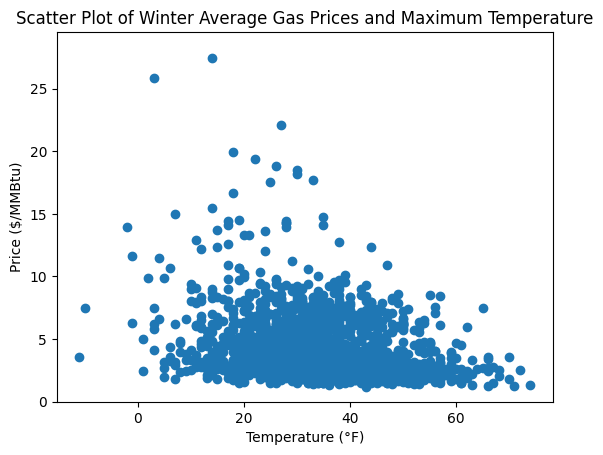

In [417]:
#scatterplot
plt.scatter(temp_and_gas_winter['TMAX'], temp_and_gas_winter['averages'])
plt.ylim(0, temp_and_gas_winter['averages'].quantile(0.999))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Winter Average Gas Prices and Maximum Temperature')
plt.show()


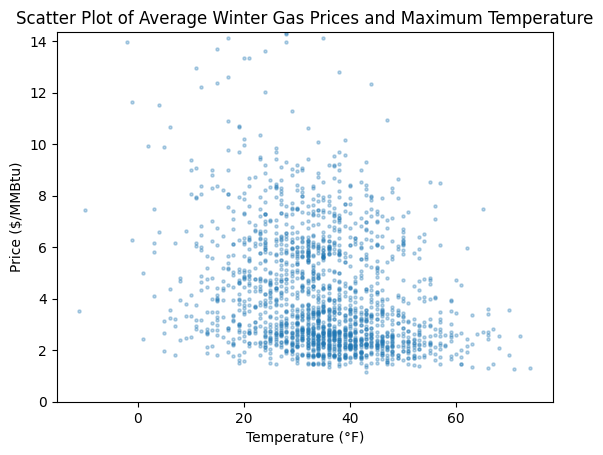

In [418]:
#reduce marker size 
plt.scatter(temp_and_gas_winter['TMAX'], temp_and_gas_winter['averages'], s=5, alpha=0.3)
plt.ylim(0, temp_and_gas_winter['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Average Winter Gas Prices and Maximum Temperature')
plt.show()

In [419]:
temp_and_gas_winter.isna().sum()
temp_and_gas_winter = temp_and_gas_winter.dropna(subset=['TMAX', 'averages'])

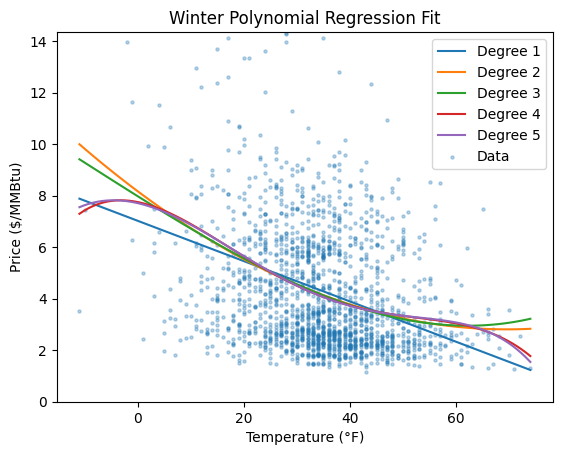

   Degree  R² Score      RMSE
0       1  0.051941  3.902920
1       2  0.055441  3.895710
2       3  0.055535  3.895515
3       4  0.056382  3.893769
4       5  0.056397  3.893736


In [420]:
#quantify results
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
x = temp_and_gas_winter['TMAX'].values
y = temp_and_gas_winter['averages'].values

degrees = [1, 2, 3, 4, 5]  #linear, quadratic, cubic, etc.
results = []

for d in degrees:
    coeffs = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeffs)
    
    y_pred = poly_eq(x)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    results.append((d, r2, rmse))
    
    x_sorted = np.linspace(x.min(), x.max(), 100)
    y_poly = poly_eq(x_sorted)
    
    plt.plot(x_sorted, y_poly, label=f'Degree {d}')

plt.scatter(x, y, s=5, alpha=0.3, label="Data")
plt.ylim(0, temp_and_gas_winter['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Winter Polynomial Regression Fit')
plt.legend()
plt.show()

# Print R² and RMSE results
df_results = pd.DataFrame(results, columns=["Degree", "R² Score", "RMSE"])
print(df_results)

In [421]:
#repeat this with summer data
temp_and_gas_summer = pd.merge(summerdailygas, summermonths, left_on='issue_dates', right_on='DATE', how='inner')
temp_and_gas_summer = temp_and_gas_summer[['issue_dates', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'averages', 'highs', 'lows']]
temp_and_gas_summer.isna().sum()
temp_and_gas_summer = temp_and_gas_summer.dropna(subset=['TMAX', 'averages'])


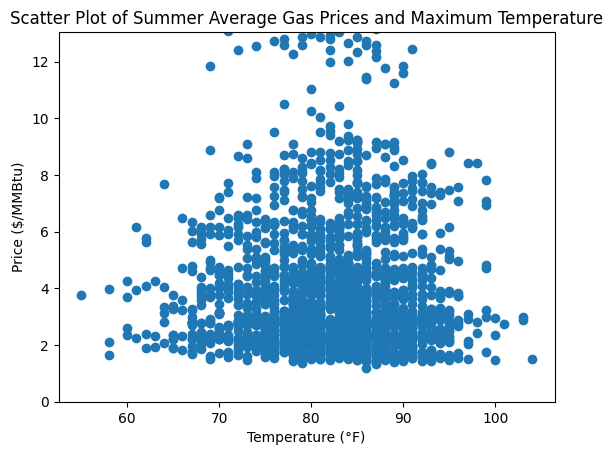

In [422]:
#scatterplot
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'])
plt.ylim(0, temp_and_gas_summer['averages'].quantile(0.999))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Summer Average Gas Prices and Maximum Temperature')
plt.show()

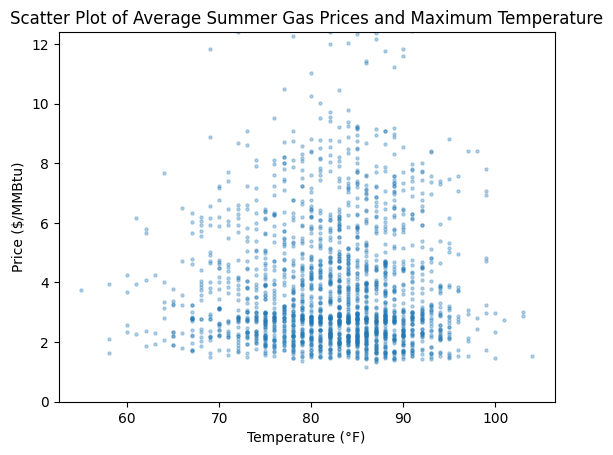

In [423]:
#reduce marker size 
plt.scatter(temp_and_gas_summer['TMAX'], temp_and_gas_summer['averages'], s=5, alpha=0.3)
plt.ylim(0, temp_and_gas_summer['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Scatter Plot of Average Summer Gas Prices and Maximum Temperature')
plt.show()

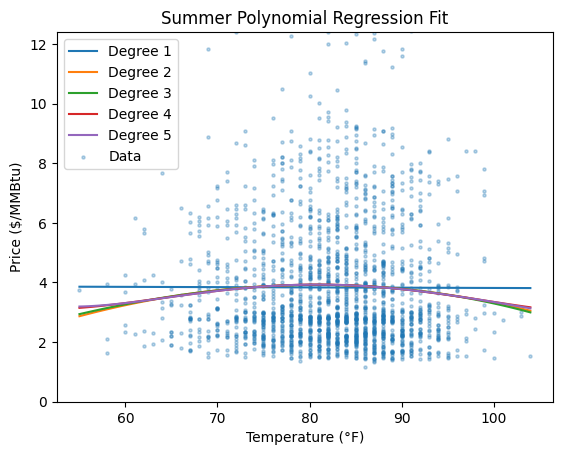

   Degree  R² Score      RMSE
0       1  0.000010  2.161148
1       2  0.002975  2.157941
2       3  0.002981  2.157935
3       4  0.003011  2.157902
4       5  0.003013  2.157901


In [424]:
x = temp_and_gas_summer['TMAX'].values
y = temp_and_gas_summer['averages'].values

degrees = [1, 2, 3, 4, 5]  #linear, quadratic, cubic, etc.
results = []

for d in degrees:
    coeffs = np.polyfit(x, y, d)
    poly_eq = np.poly1d(coeffs)
    
    y_pred = poly_eq(x)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    results.append((d, r2, rmse))
    
    x_sorted = np.linspace(x.min(), x.max(), 100)
    y_poly = poly_eq(x_sorted)
    
    plt.plot(x_sorted, y_poly, label=f'Degree {d}')

plt.scatter(x, y, s=5, alpha=0.3, label="Data")
plt.ylim(0, temp_and_gas_summer['averages'].quantile(0.99))
plt.xlabel('Temperature (°F)')
plt.ylabel('Price ($/MMBtu)')
plt.title('Summer Polynomial Regression Fit')
plt.legend()
plt.show()

# Print R² and RMSE results
df_results = pd.DataFrame(results, columns=["Degree", "R² Score", "RMSE"])
print(df_results)

**Exploratory Analysis for Extremes**

In [425]:
#make a function that pulls the 5 highest 5 day streak of high temperatures
def highest_streak(data: pd.DataFrame, temp_column: str, date_column: str) -> pd.DataFrame:
    """
    Finds the 5 highest 5-day streaks of maximum temperature in the dataset.

    :param data: DataFrame containing the data.
    :param temp_column: The name of the column containing temperature values.
    :param date_column: The name of the column containing date values.
    :return: DataFrame containing the 5 highest 5-day streaks of maximum temperature.
    """
    # Calculate the 5-day maximum temperature from a sum 
    data['5-day Max'] = data[temp_column].rolling(5).sum()
    
    # Find the 5 highest 5-day streaks
    highest_streaks = data.nlargest(5, '5 day sum')
    
    return highest_streaks[[date_column, temp_column, '5 day sum']]

In [426]:
temp_and_gas.head()

,DATE,TMAX,TMIN,PRCP,SNOW,averages,highs,lows
0,1993-07-14,79.0,61.0,0.0,0.0,2.16,2.17,2.15
1,1993-07-15,80.0,59.0,0.0,0.0,2.16,2.17,2.14
2,1993-07-16,82.0,61.0,0.0,0.0,2.15,2.17,2.13
3,1993-07-19,88.0,65.0,0.0,0.0,2.15,2.17,2.13
4,1993-07-20,80.0,62.0,0.0,0.0,2.15,2.17,2.14


In [427]:
#print id 503
print(temp_and_gas.loc[503])

DATE        1995-07-12
TMAX              97.0
TMIN              73.0
PRCP               0.0
SNOW               0.0
averages          1.52
highs             1.56
lows              1.47
Name: 503, dtype: object


In [428]:
def top_5_hottest_periods(data, temp_col='TMAX'):
    """
    Finds the top 5 highest non-overlapping 5-day temperature streaks.

    Parameters:
        data (pd.DataFrame): DataFrame containing temperature data.
        temp_col (str): Column name for temperature values.

    Returns:
        pd.DataFrame: Top 5 non-overlapping instances of highest 5-day total temperatures.
    """

    # Compute rolling 5-day sum
    data['5_day_sum'] = data[temp_col].rolling(window=5).sum()

    # List to store non-overlapping top periods
    selected_indices = []
    temp_data = data.copy()

    for _ in range(5):  # Find the top 5 unique periods
        # Find the max 5-day sum index
        if temp_data['5_day_sum'].dropna().empty:
            break
        max_index = int(temp_data['5_day_sum'].idxmax())
        max_pos = temp_data.index.get_loc(max_index)

        # Store the index
        selected_indices.append(max_index)

        # Drop overlapping periods (current 5-day window)
        temp_data = temp_data.drop(index=range(max_index, min(max_index + 5, len(temp_data))))

    # Retrieve final results from original data
    top_5_periods = data.iloc[selected_indices].sort_values(by='5_day_sum', ascending=False)

    return top_5_periods

In [429]:
def top_5_non_overlapping_hottest_periods(data, temp_col='TMAX'):
    """
    Finds the top 5 highest non-overlapping 5-day temperature streaks.

    Parameters:
        data (pd.DataFrame): DataFrame containing temperature data.
        temp_col (str): Column name for temperature values.

    Returns:
        pd.DataFrame: Top 5 non-overlapping instances of highest 5-day total temperatures.
    """
    # Sort by date if applicable
    if 'date' in data.columns:
        data = data.sort_values(by='date').reset_index(drop=True)

    # Compute rolling 5-day sum
    data['5_day_sum'] = data[temp_col].rolling(window=5).sum()

    # List to store non-overlapping top periods
    selected_indices = []
    temp_data = data.copy()

    for _ in range(30):  # Find the top 5 unique periods
        if temp_data['5_day_sum'].dropna().empty:
            break  # Stop if there are no more valid windows

        # Find the max 5-day sum index and convert to an integer
        max_index = temp_data['5_day_sum'].idxmax()
        
        # Convert to positional index for iloc
        max_pos = temp_data.index.get_loc(max_index)

        # Store the index
        selected_indices.append(max_index)

        # Drop overlapping periods (current 5-day window)
        temp_data = temp_data.drop(temp_data.index[max_pos:min(max_pos + 5, len(temp_data))])

    # Retrieve final results from original data
    top_5_periods = data.loc[selected_indices].sort_values(by='5_day_sum', ascending=False)

    return top_5_periods

In [430]:
print(top_5_non_overlapping_hottest_periods(temp_and_gas, temp_col='TMAX'))

            DATE   TMAX  TMIN  PRCP  SNOW  averages  highs   lows  5_day_sum
4754  2012-07-09   91.0  66.0  0.00   0.0     2.970  3.040  2.920      491.0
4753  2012-07-06  103.0  82.0  0.00   0.0     3.000  3.030  2.950      488.0
4752  2012-07-05  103.0  79.0  0.28   0.0     2.870  2.930  2.830      485.0
505   1995-07-14  100.0  83.0  0.00   0.0     1.480  1.520  1.460      477.0
3269  2006-08-02   97.0  77.0  0.26   0.0     8.410  8.600  7.670      476.0
4751  2012-07-03   96.0  77.0  0.00   0.0     2.790  2.870  2.750      474.0
6793  2020-08-28   95.0  77.0  0.00   0.0     2.280  2.300  2.270      472.0
4513  2011-07-22   88.0  70.0  1.55   0.0     4.710  4.760  4.660      471.0
7245  2022-06-21   99.0  73.0  0.00   0.0     6.935  6.950  6.920      471.0
4512  2011-07-21   99.0  75.0  0.02   0.0     4.810  4.840  4.750      470.0
236   1994-06-17   93.0  70.0  0.87   0.0     2.160  2.180  2.150      468.0
2997  2005-06-29   90.0  73.0  0.02   0.0     7.090  7.200  6.950      468.0